In [22]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams['image.cmap'] = 'gray'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:

import keras

import os
import datasets
import models
dataset="fashion_mnist"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)


print(input_shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)
(28, 28, 1)


In [27]:

lr=0.001

cardinality,bottleneck_filters,initial_filters=16,32,64
model = models.stn_resnext(input_shape,num_classes,cardinality,bottleneck_filters,initial_filters)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])
print(model.summary())
print(model.name)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
spatial_transformer_11 (Spatial (None, 28, 28, 1)    11896       input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_1347 (Conv2D)            (None, 28, 28, 64)   640         spatial_transformer_11[0][0]     
__________________________________________________________________________________________________
batch_normalization_81 (BatchNo (None, 28, 28, 64)   256         conv2d_1347[0][0]                
__________________________________________________________________________________________________
activation

In [28]:


rotated_model = models.stn_resnext(input_shape,num_classes,cardinality,bottleneck_filters,initial_filters)
rotated_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])
print(rotated_model.summary())
print(rotated_model.name)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
spatial_transformer_12 (Spatial (None, 28, 28, 1)    11896       input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_1514 (Conv2D)            (None, 28, 28, 64)   640         spatial_transformer_12[0][0]     
__________________________________________________________________________________________________
batch_normalization_91 (BatchNo (None, 28, 28, 64)   256         conv2d_1514[0][0]                
__________________________________________________________________________________________________
activation

Training model with unrotated dataset...
Epoch 1/3
938/937 [==============================] - 115s 122ms/step - loss: 0.4345 - acc: 0.8421 - val_loss: 3.9229 - val_acc: 0.2639
Epoch 2/3
938/937 [==============================] - 109s 116ms/step - loss: 0.4349 - acc: 0.8363 - val_loss: 11.1640 - val_acc: 0.1604
Epoch 3/3
938/937 [==============================] - 109s 116ms/step - loss: 0.4151 - acc: 0.8447 - val_loss: 3.3133 - val_acc: 0.3763


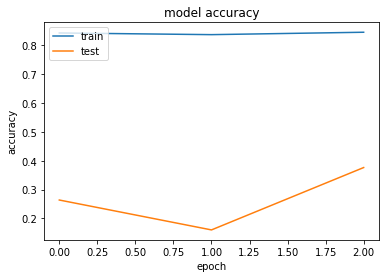

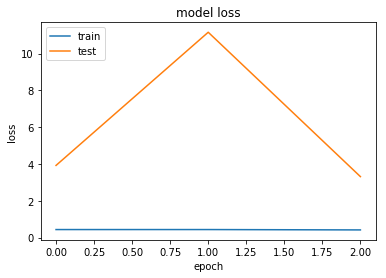

Training rotated model with rotated dataset...
Epoch 1/12
938/937 [==============================] - 117s 125ms/step - loss: 0.9829 - acc: 0.6506 - val_loss: 1.3649 - val_acc: 0.5732
Epoch 2/12
938/937 [==============================] - 111s 118ms/step - loss: 0.7585 - acc: 0.7297 - val_loss: 4.2374 - val_acc: 0.2392
Epoch 3/12
938/937 [==============================] - 111s 118ms/step - loss: 0.7595 - acc: 0.7271 - val_loss: 4.4000 - val_acc: 0.2904
Epoch 4/12
938/937 [==============================] - 111s 118ms/step - loss: 0.6749 - acc: 0.7557 - val_loss: 1.2827 - val_acc: 0.6221
Epoch 5/12
938/937 [==============================] - 111s 118ms/step - loss: 0.6423 - acc: 0.7646 - val_loss: 0.8560 - val_acc: 0.6954
Epoch 6/12
938/937 [==============================] - 111s 118ms/step - loss: 0.6657 - acc: 0.7575 - val_loss: 0.9366 - val_acc: 0.6742
Epoch 7/12
938/937 [==============================] - 111s 119ms/step - loss: 0.7052 - acc: 0.7464 - val_loss: 4.6522 - val_acc: 0.3302
E

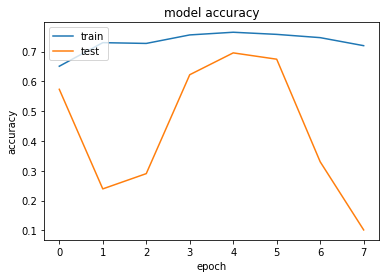

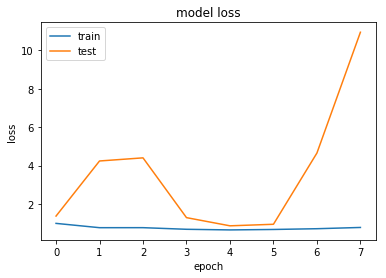

Testing both models on both datasets...


In [29]:
import experiment
batch_size = 64
epochs=3
rotated_epochs=epochs*4
scores=experiment.train_rotated(model,rotated_model,x_train,y_train,x_test,
                          y_test,num_classes,input_shape,batch_size,epochs,rotated_epochs)

In [10]:
from datetime import datetime

output_file="results_stn.txt"
f= open(output_file,"a+")
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
f.write(general_message)
print(general_message)
for k,v in scores.items():
    message='%s score: loss=%f, accuracy=%f\n' % (k,v[0],v[1])
    print(message)
    f.write(message)
f.write("\n\n")    
f.close()

2018-03-03 07:19:34.031507
Results on dataset cifar10 with model stn and rotated model stn

rotated_model_test_dataset score: loss=1.737037, accuracy=0.376700

model_test_dataset score: loss=2.303351, accuracy=0.100000

rotated_model_rotated_test_dataset score: loss=1.762379, accuracy=0.370300

model_rotated_test_dataset score: loss=2.303334, accuracy=0.100100



In [ ]:
# visualize first layer
#https://github.com/oarriaga/spatial_transformer_networks/blob/master/src/mnist_cluttered_example.ipynb


#also check
#http://docplayer.net/amp/65274209-Tied-spatial-transformer-networks-for-character-recognition.html